In [9]:
import pandas as pd
import numpy as np

# Define a date range for two weeks, which will inherently include weekends
dates = pd.date_range(start='2023-12-20', periods=14)  # Includes Christmas and New Year's Day
deal_ids = ['Deal1', 'Deal2', 'Deal3']
num_deals = len(deal_ids)

# Generate random float data
np.random.seed(42)  # For reproducibility
data = {
    'PricingDate': np.tile(dates, num_deals),
    'Unique_ID': np.repeat(deal_ids, len(dates)),
    'FloatFeature1': np.random.rand(num_deals * len(dates)) * 100,
    'FloatFeature2': np.random.rand(num_deals * len(dates)) * 100,
    'FloatFeature3': np.random.rand(num_deals * len(dates)) * 100,
    'FloatFeature4': np.random.rand(num_deals * len(dates)) * 100,
    'FloatFeature5': np.random.rand(num_deals * len(dates)) * 100
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'PricingDate' to datetime type
df['PricingDate'] = pd.to_datetime(df['PricingDate'])

# Exclude Saturdays and Sundays
df = df[~df['PricingDate'].dt.dayofweek.isin([5, 6])]

# Exclude Christmas and New Year's Day using the correct .dt accessor
df = df[~((df['PricingDate'].dt.month == 12) & (df['PricingDate'].dt.day == 25))]
df = df[~((df['PricingDate'].dt.month == 1) & (df['PricingDate'].dt.day == 1))]

print(df.head(10))  # Display the first 10 rows of the modified DataFrame


   PricingDate Unique_ID  FloatFeature1  FloatFeature2  FloatFeature3  \
0   2023-12-20     Deal1      37.454012       3.438852      31.098232   
1   2023-12-21     Deal1      95.071431      90.932040      32.518332   
2   2023-12-22     Deal1      73.199394      25.877998      72.960618   
6   2023-12-26     Deal1       5.808361      54.671028      11.959425   
7   2023-12-27     Deal1      86.617615      18.485446      71.324479   
8   2023-12-28     Deal1      60.111501      96.958463      76.078505   
9   2023-12-29     Deal1      70.807258      77.513282      56.127720   
13  2024-01-02     Deal1      21.233911      92.187424      42.754102   
14  2023-12-20     Deal2      18.182497       8.849250       2.541913   
15  2023-12-21     Deal2      18.340451      19.598286      10.789143   

    FloatFeature4  FloatFeature5  
0       81.801477       4.077514  
1       86.073058      59.089294  
2        0.695213      67.756436  
6       11.986537      64.517279  
7       33.761517    

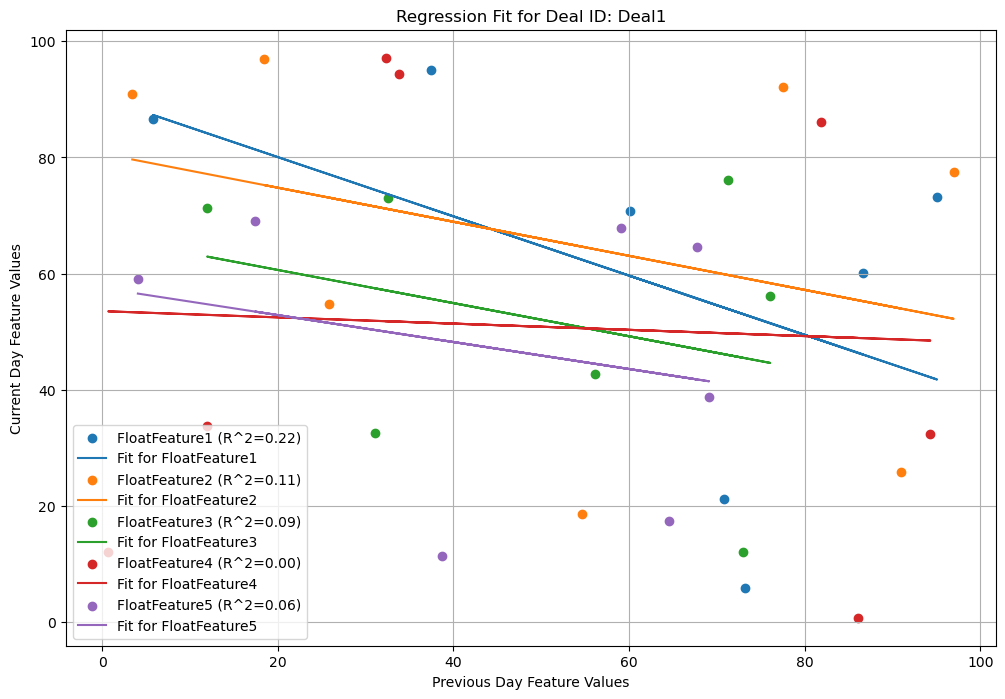

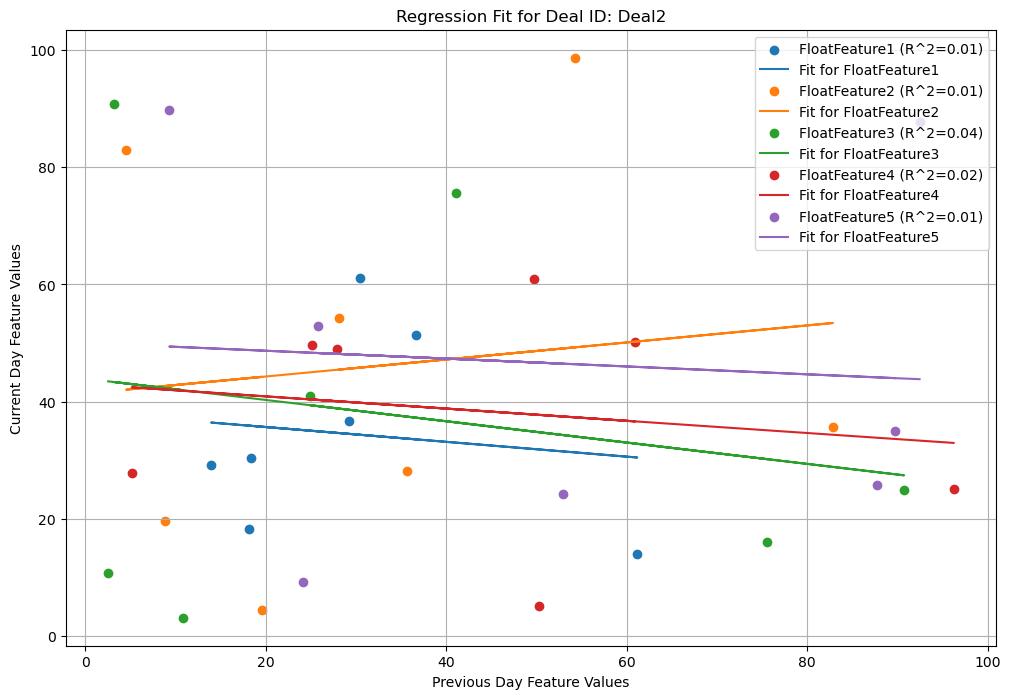

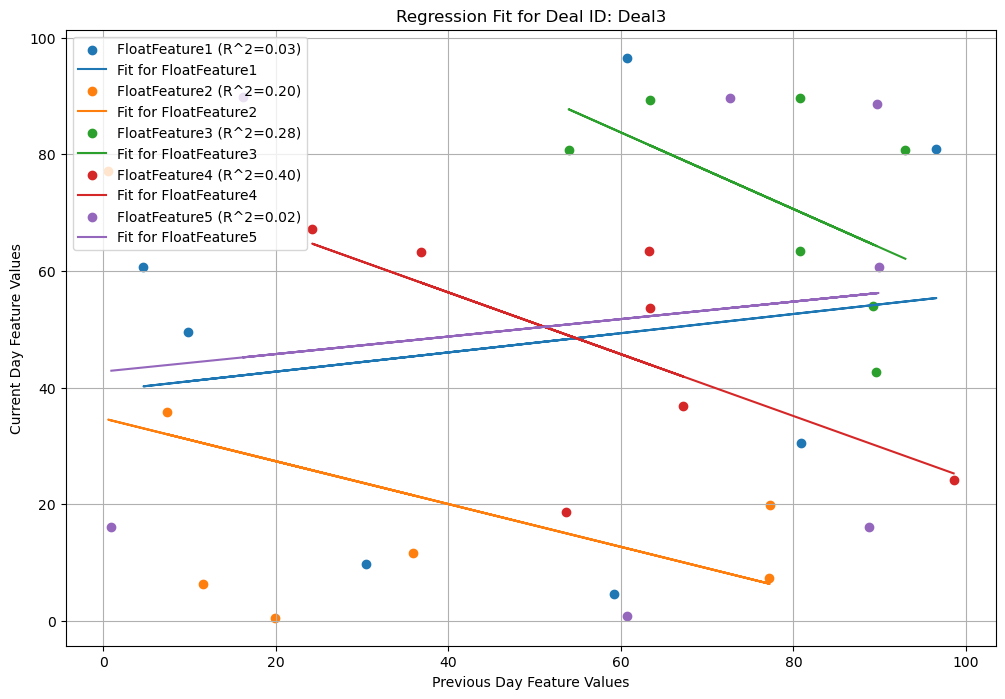

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with daily data for each deal
df['PricingDate'] = pd.to_datetime(df['PricingDate'])
df.sort_values(by=['Unique_ID', 'PricingDate'], inplace=True)

# Define the float features
features = ['FloatFeature1', 'FloatFeature2', 'FloatFeature3', 'FloatFeature4', 'FloatFeature5']

# Function to calculate R^2 and plot regression
def plot_regression(data, features):
    results = []
    
    # Shift each feature by one day to align yesterday's features with today
    for feature in features:
        data[f'prev_{feature}'] = data[feature].shift(1)
    
    # Drop rows where any previous day's feature data is NaN
    data = data.dropna(subset=[f'prev_{feature}' for feature in features])
    
    # Set up the plot
    plt.figure(figsize=(12, 8))
    
    for feature in features:
        if len(data) > 1:  # Need at least two data points
            X = data[[f'prev_{feature}']]
            y = data[feature]
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)
            
            # Plotting
            plt.scatter(X, y, label=f'{feature} (R^2={r2:.2f})')
            plt.plot(X, y_pred, label=f'Fit for {feature}')
    
    plt.title(f'Regression Fit for Deal ID: {data.iloc[0]["Unique_ID"]}')
    plt.xlabel('Previous Day Feature Values')
    plt.ylabel('Current Day Feature Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return r2

# Apply the function for each deal
for deal_id, group_data in df.groupby('Unique_ID'):
    plot_regression(group_data, features)


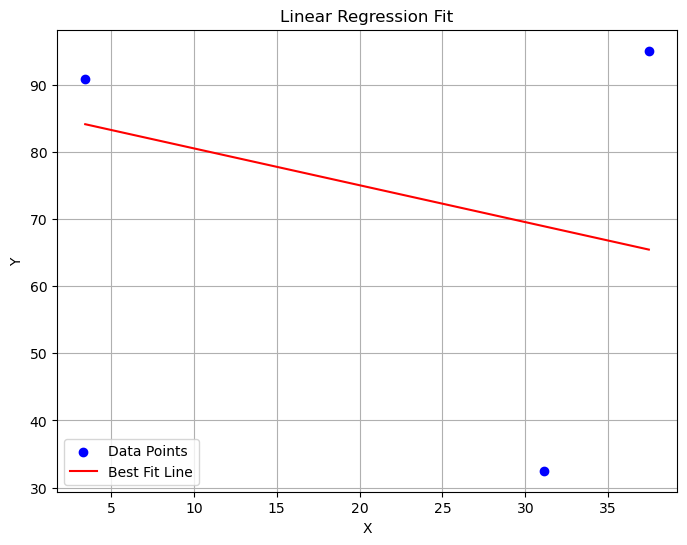

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define data points
X = np.array([37.454012, 3.438852, 31.098232]).reshape(-1, 1)  # Predictor
y = np.array([95.071431, 90.932040, 32.518332])  # Response

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions for a smooth line
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_fit, y_fit, color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()
